In [67]:
import numpy as np
import pandas as pd


In [68]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [69]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?,NaN,NaN,NaN
4722,ham,HELLO PEACH! MY CAKE TASTS LUSH!,NaN,NaN,NaN
5066,spam,83039 62735=å£450 UK Break AccommodationVouche...,NaN,NaN,NaN
762,spam,Urgent Ur å£500 guaranteed award is still uncl...,NaN,NaN,NaN


In [70]:
df.shape

(5572, 5)

In [71]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# **#1: Data cleaning**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [73]:
#drop last 3 col
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [74]:
df.sample(5)

,v1,v2
4833,ham,I hope your pee burns tonite.
3329,ham,Send me yetty's number pls.
5415,ham,You should get more chicken broth if you want ...
4368,ham,Anytime lor...
638,ham,"What will we do in the shower, baby?"


In [75]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
159,spam,You are a winner U have been specially selecte...
1707,ham,Was doing my test earlier. I appreciate you. W...
3256,ham,"No, but you told me you were going, before you..."
430,ham,At home watching tv lor.
2355,ham,"Hello, my love ! How went your day ? Are you a..."


In [76]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [77]:
df['target'] = encoder.fit_transform(df['target'])

In [78]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [80]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [81]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [82]:
df.duplicated().sum()

np.int64(0)

In [83]:
df.shape

(5169, 2)

# **#2: EDA**

In [84]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
df['target'].value_counts()

,count
target,
0,4516
1,653


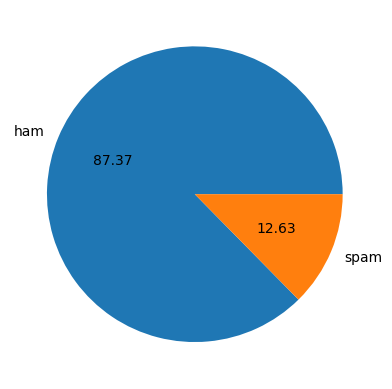

In [86]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [87]:
# Data is imbalanced

In [88]:
import nltk

In [89]:
!pip install nltk

In [90]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
df['num_characters'] = df['text'].apply(len)

In [92]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [93]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
import nltk
# 1. Download the resource again (just to be safe)
nltk.download('punkt', quiet=True)

# 2. Check if NLTK can find the resource now
try:
    path = nltk.data.find('tokenizers/punkt/english.pickle')
    print(f" Success: NLTK found 'punkt' data at: {path}")
except LookupError:
    print(" Error: NLTK still can't find 'punkt' data.")

 Success: NLTK found 'punkt' data at: /root/nltk_data/tokenizers/punkt/english.pickle


In [95]:

df['num_words'] = df['text'].apply(lambda x: len(x.split()))

In [96]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [97]:
import re

def count_sentences_robust(text):
    # This regular expression counts segments split by common sentence-ending punctuation:
    # period (.), exclamation mark (!), or question mark (?)
    sentences = re.split(r'[.!?]', text)

    # Filter out empty strings that result from trailing punctuation (e.g., "Hello.").
    # Then count the number of resulting non-empty segments (sentences).
    return len([s for s in sentences if s.strip()])

# Apply the function to your 'text' column
df['num_sentences'] = df['text'].apply(count_sentences_robust)

print("✅ 'num_sentences' column created successfully using re.split().")

✅ 'num_sentences' column created successfully using re.split().


In [98]:
df['num_sentences'] = df['text'].apply(lambda x: len(x.split()))

In [99]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,28
3,0,U dun say so early hor... U c already then say...,49,11,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,13


In [100]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,15.340685
std,58.236293,11.068488,11.068488
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,7.000000
50%,60.000000,12.000000,12.000000
75%,117.000000,22.000000,22.000000
max,910.000000,171.000000,171.000000


In [101]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,14.134632
std,56.358207,11.116240,11.116240
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,7.000000
50%,52.000000,11.000000,11.000000
75%,90.000000,18.000000,18.000000
max,910.000000,171.000000,171.000000


In [102]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,23.681470
std,30.137753,5.967672,5.967672
min,13.000000,2.000000,2.000000
25%,132.000000,22.000000,22.000000
50%,149.000000,25.000000,25.000000
75%,157.000000,28.000000,28.000000
max,224.000000,35.000000,35.000000


In [103]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

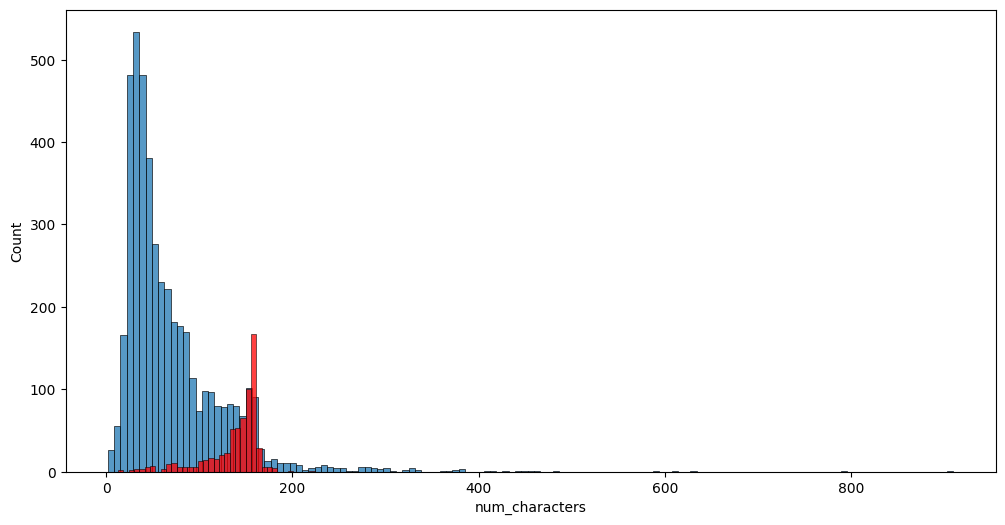

In [104]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

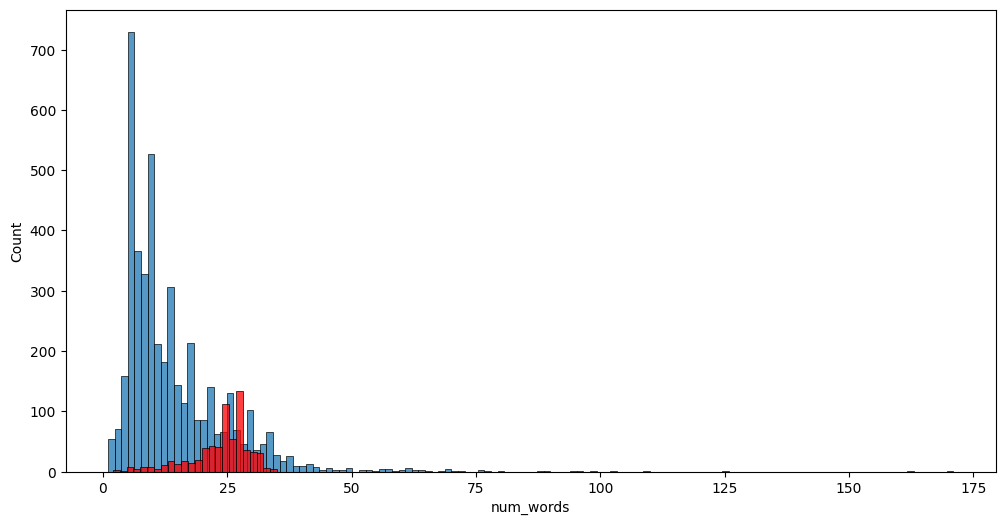

In [105]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

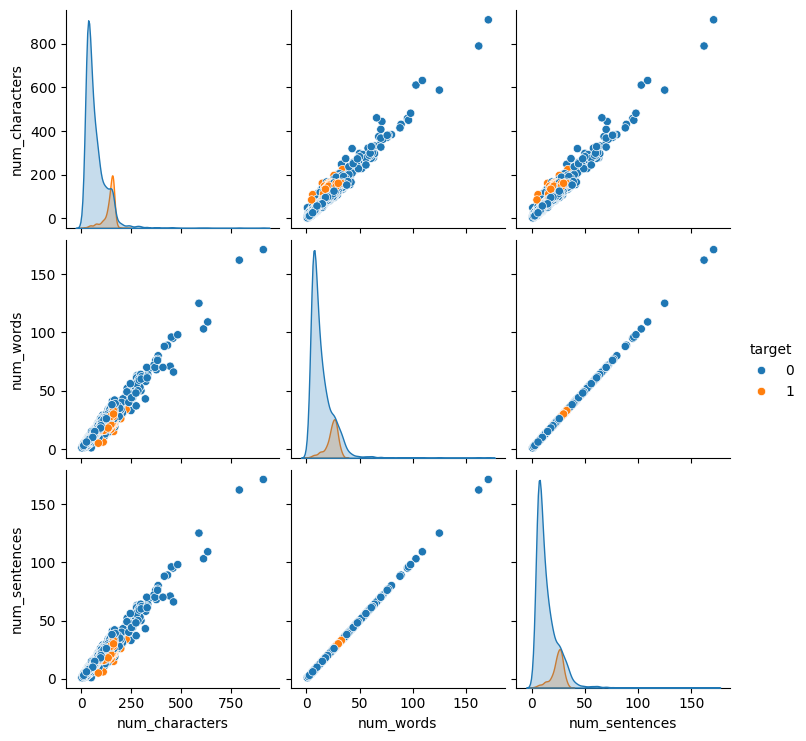

In [106]:
sns.pairplot(df,hue='target')

<Axes: >

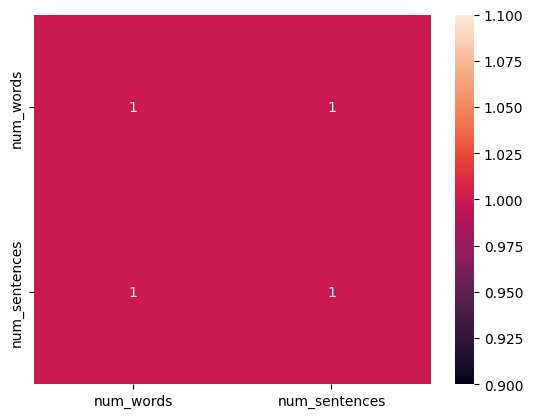

In [107]:
# Select only the numerical features for correlation calculation
numerical_features = df[['num_words', 'num_sentences']].corr()

# If you also have a 'num_characters' column, include it:
# numerical_features = df[['num_characters', 'num_words', 'num_sentences']].corr()

# Generate the heatmap using the correlation of only the numerical features
sns.heatmap(numerical_features, annot=True)

## **3. Data Preprocessing**
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [108]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [109]:
import nltk
print("Starting NLTK resource downloads...")
# Download the essential resources needed for your project:
nltk.download('punkt', quiet=True)     # For word and sentence tokenization (if needed later)
nltk.download('stopwords', quiet=True)  # For stop word removal
nltk.download('wordnet', quiet=True)    # For lemmatization (if used)
print("All necessary NLTK resources downloaded for this session.")

Starting NLTK resource downloads...
All necessary NLTK resources downloaded for this session.


In [110]:
import nltk
print("Downloading NLTK dependencies...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
print("Downloads complete.")

Downloads complete.


In [111]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Robust Tokenization (using Regex, NOT NLTK)
    tokens = re.findall(r'\b[a-z0-9]+\b', text)

    y = []
    for i in tokens:
        if i not in stop_words:
            # 3. Stemming
            y.append(ps.stem(i))

    # Rejoin the processed words into a single string
    return " ".join(y)

print("✅ transform_text function successfully redefined and ready.")

✅ transform_text function successfully redefined and ready.


In [112]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gonna home soon want talk stuff anymor tonight k cri enough today'

In [113]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [114]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [115]:
df['transformed_text'] = df['text'].apply(transform_text)

In [116]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,13,nah think goe usf live around though


In [117]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [118]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

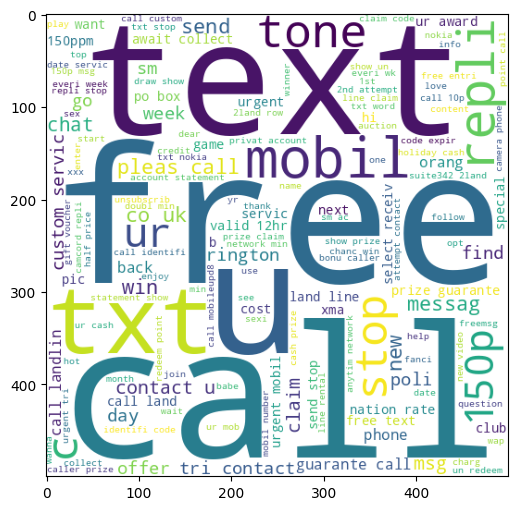

In [119]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [120]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

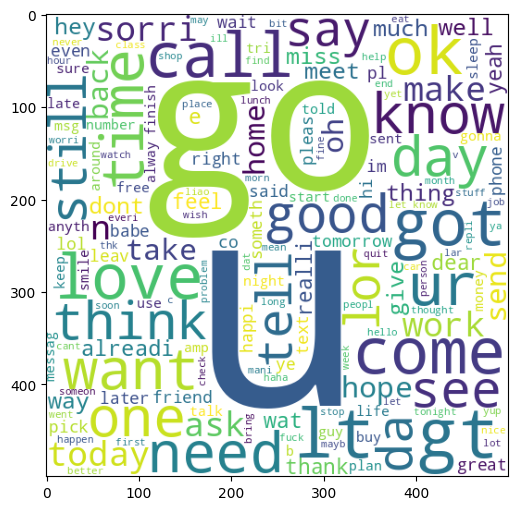

In [121]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [122]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,13,nah think goe usf live around though


In [123]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [124]:
len(spam_corpus)

11718

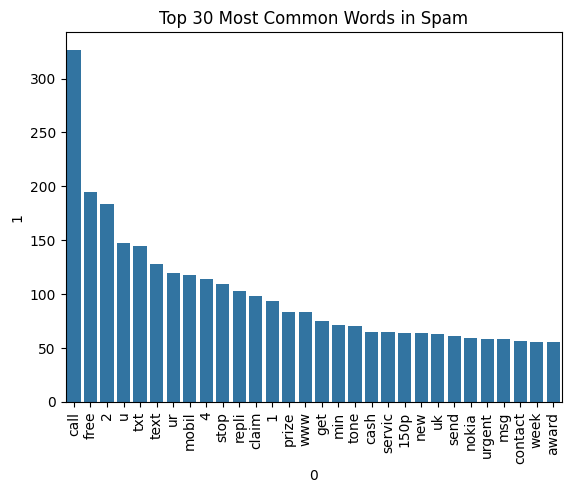

In [125]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# 1. Create a DataFrame for the top 30 words and their counts
temp_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

# 2. Use the correct syntax with keyword arguments (x=, y=)
sns.barplot(x=temp_df[0], y=temp_df[1])

plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam")
plt.show()

In [126]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [127]:
len(ham_corpus)

36208

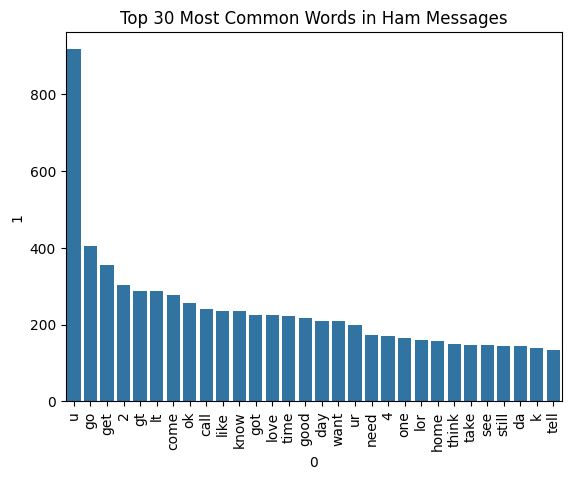

In [128]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# 1. Create a DataFrame from the top 30 word counts in the ham corpus
temp_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

# 2. Use the correct syntax with keyword arguments (x=, y=).
# temp_df[0] holds the words (X-axis) and temp_df[1] holds the counts (Y-axis).
sns.barplot(x=temp_df[0], y=temp_df[1])

plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Messages")
plt.show()

In [129]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,13,nah think goe usf live around though


# **4. Model Building**

In [130]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [131]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [133]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [134]:
X.shape

(5169, 3000)

In [135]:
y = df['target'].values

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [138]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [139]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [140]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8810444874274661
[[785 111]
 [ 12 126]]
0.5316455696202531


In [141]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9854932301740812
[[892   4]
 [ 11 127]]
0.9694656488549618


In [142]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9893617021276596
[[896   0]
 [ 11 127]]
1.0


In [143]:
# tfidf --> MNB

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [145]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [146]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [147]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [148]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9516129032258065)

In [149]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9854932301740812
Precision -  0.9694656488549618
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8207547169811321
For  LR
Accuracy -  0.9700193423597679
Precision -  0.9734513274336283
For  RF
Accuracy -  0.9796905222437138
Precision -  0.9834710743801653
For  AdaBoost
Accuracy -  0.9226305609284333
Precision -  0.8372093023255814
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8518518518518519
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  GBDT
Accuracy -  0.9458413926499033
Precision -  0.9456521739130435
For  xgb
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032


In [150]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [151]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
5,RF,0.979691,0.983471
10,xgb,0.980658,0.975806
4,LR,0.970019,0.973451
2,NB,0.985493,0.969466
8,ETC,0.977756,0.967480
0,SVC,0.974855,0.951613
9,GBDT,0.945841,0.945652
7,BgC,0.958414,0.851852
6,AdaBoost,0.922631,0.837209


In [152]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [153]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,RF,Accuracy,0.979691
2,xgb,Accuracy,0.980658
3,LR,Accuracy,0.970019
4,NB,Accuracy,0.985493
5,ETC,Accuracy,0.977756
6,SVC,Accuracy,0.974855
7,GBDT,Accuracy,0.945841
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.922631


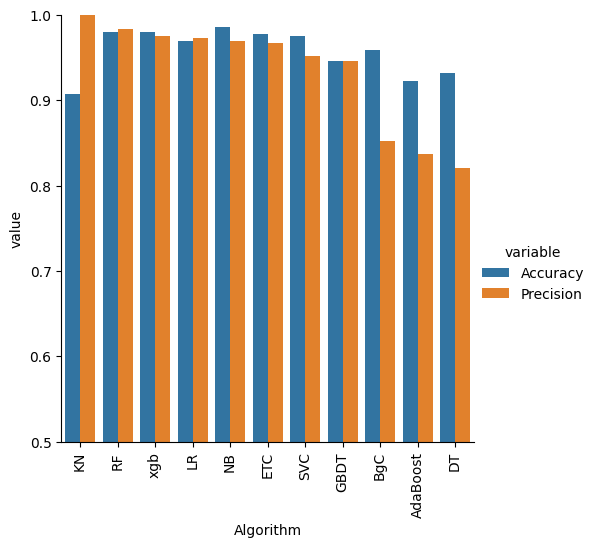

In [154]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [155]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [156]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [157]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [158]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [159]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [160]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [161]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,RF,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471,0.979691,0.983471
2,xgb,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
3,LR,0.970019,0.973451,0.970019,0.973451,0.970019,0.973451,0.970019,0.973451
4,NB,0.985493,0.969466,0.985493,0.969466,0.985493,0.969466,0.985493,0.969466
5,ETC,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480
6,SVC,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613
7,GBDT,0.945841,0.945652,0.945841,0.945652,0.945841,0.945652,0.945841,0.945652
8,BgC,0.958414,0.851852,0.958414,0.851852,0.958414,0.851852,0.958414,0.851852
9,AdaBoost,0.922631,0.837209,0.922631,0.837209,0.922631,0.837209,0.922631,0.837209


In [162]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [163]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [164]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [165]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.984251968503937


In [166]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [167]:
from sklearn.ensemble import StackingClassifier

In [168]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [169]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9624060150375939


In [170]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from google.colab import files
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# You need to ensure 'df' and 'processed_text' are defined by running previous cells!
# If your variables are named 'X_train' and 'y_train', use those instead.

# --- STEP 1: RE-RUN THE CREATION/FITTING (CRITICAL) ---
try:
    # --- ASSUMPTION ---
    # We are assuming you have run the cells to create your training data (X_train and y_train)
    # If you used X_train and y_train, uncomment the next two lines and delete the current ones.
    # tfidf_data = X_train
    # y_train_labels = y_train

    # Placeholder for the actual variables used to train your model (ADJUST THESE NAMES!)
    # I am using X_train and y_train as they are the standard names.
    # If your entire processed text data is in a column, it might be df['processed_text'].
    tfidf_data = X_train # Replace X_train with your variable holding the cleaned text for training
    y_train_labels = y_train # Replace y_train with your variable holding the target labels

    # 1a. Recreate and Fit the Vectorizer
    # This must match your original vectorizer setup
    tfidf = TfidfVectorizer(max_features=3000).fit(tfidf_data) # Use your max_features if different

    # 1b. Transform the training data
    X_train_transformed = tfidf.transform(tfidf_data)

    # 2. Recreate and Train the Model
    mnb = MultinomialNB().fit(X_train_transformed, y_train_labels)

    print("✅ Vectorizer and Model successfully redefined and retrained.")

    # --- STEP 2: SAVE THE ARTIFACTS ---

    # 3. Save the Vectorizer and Model using pickle
    pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
    pickle.dump(mnb, open('model.pkl', 'wb'))
    print("✅ Files saved to 'vectorizer.pkl' and 'model.pkl'.")

    # 4. Download the files
    files.download('vectorizer.pkl')
    files.download('model.pkl')
    print("Downloads initiated.")

except NameError as e:
    print(f"\n❌ CRITICAL ERROR: NameError: {e}. One of the variables (like X_train or y_train) is not defined.")
    print("Please ensure you have run ALL cells in your notebook that create and train your model BEFORE running this block.")
    print("If the variables are named differently (e.g., 'X_train_data' or 'df['target']'), please update the code block above with the correct names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: 'numpy.ndarray' object has no attribute 'lower'


In [172]:
# --- RUN THIS CODE AFTER RUNNING ALL TRAINING CELLS ---

import joblib
from google.colab import files # Used for downloading files

# 1. Save the Trained Model
try:
    # REPLACED PLACEHOLDER with 'mnb'
    joblib.dump(mnb, 'trained_model.joblib')
    print("✅ Trained model saved as 'trained_model.joblib'")
except NameError:
    # If this fails, it means you haven't run the cell that created the 'mnb' variable!
    print("⚠️ CRITICAL ERROR: Name 'mnb' is not defined. Please run all model training cells first!")

# 2. Save the Vectorizer
try:
    # REPLACED PLACEHOLDER with 'tfidf'
    joblib.dump(tfidf, 'vectorizer.joblib')
    print("✅ Vectorizer saved as 'vectorizer.joblib'")
except NameError:
    # If this fails, it means you haven't run the cell that created the 'tfidf' variable!
    print("⚠️ CRITICAL ERROR: Name 'tfidf' is not defined. Please run all vectorizer fitting cells first!")

# 3. Download the files to your local machine
print("\nInitiating download...")
files.download('trained_model.joblib')
files.download('vectorizer.joblib')
print("Downloads should start shortly. Check your browser's download queue.")

✅ Trained model saved as 'trained_model.joblib'
✅ Vectorizer saved as 'vectorizer.joblib'

Initiating download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloads should start shortly. Check your browser's download queue.
